In [69]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False
import warnings
warnings.filterwarnings(action='ignore') 

In [70]:
data_all = pd.read_csv("./데이터/2. 선정기업자료.csv",encoding='cp949',index_col=0)
backtest_all = pd.read_csv("./데이터/2. 주식데이터.csv",encoding='cp949',index_col=0)
kosdaq = pd.read_csv("./데이터/1. 코스닥 데이터.csv",encoding='cp949')

In [71]:
data_all 

,회사명,거래소코드,회계년도,상장일,상장폐지일,소속코드,산업명,자기자본증가율,총자본증가율,매출액순이익률,...,매출액순이익률_점수,자기자본순이익률_점수,총자본사업이익률_점수,총자본순이익률_점수,순운전자본비율_점수,자기자본구성비율_점수,자기자본배율_점수,매출채권회전기간_점수,순운전자본회전률_점수,부가가치율_점수
0,(주)CMG제약,58820,2011-12-01,2001-08-31,NaN,5,의료용 물질 및 의약품 제조업,-2.02,1.98,-8.50,...,2.0,2.0,4.0,2.0,7.0,7.0,1.0,1.0,4.0,5.0
1,(주)ES큐브,50120,2011-12-01,2002-04-25,NaN,5,도매 및 상품 중개업,-7.92,12.78,-8.99,...,2.0,2.0,2.0,2.0,8.0,8.0,2.0,4.0,6.0,6.0
2,(주)가비아,79940,2011-12-01,2005-10-19,NaN,5,출판업,30.73,22.76,13.28,...,9.0,9.0,9.0,10.0,6.0,8.0,3.0,10.0,8.0,10.0
3,(주)고영테크놀러지,98460,2011-12-01,2008-06-03,NaN,5,기타 기계 및 장비 제조업,26.23,23.10,18.15,...,10.0,10.0,10.0,10.0,10.0,9.0,9.0,3.0,7.0,8.0
4,(주)골드앤에스,35290,2011-12-01,1999-12-07,NaN,5,출판업,3.73,3.62,2.11,...,5.0,5.0,5.0,5.0,3.0,4.0,1.0,7.0,6.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
631,현우산업(주),92300,2020-12-01,2007-10-24,NaN,5,"전자부품, 컴퓨터, 영상, 음향 및 통신장비 제조업",-0.34,4.88,0.73,...,5.0,5.0,4.0,5.0,5.0,3.0,6.0,6.0,8.0,5.0
632,화성밸브(주),39610,2020-12-01,2000-03-16,NaN,5,기타 기계 및 장비 제조업,2.71,5.94,-0.36,...,4.0,4.0,3.0,4.0,8.0,10.0,5.0,2.0,8.0,3.0
633,화일약품(주),61250,2020-12-01,2002-04-18,NaN,5,의료용 물질 및 의약품 제조업,31.34,21.72,-45.71,...,1.0,1.0,4.0,1.0,1.0,2.0,3.0,6.0,4.0,1.0
634,휴림로봇(주),90710,2020-12-01,2006-12-05,NaN,5,기타 기계 및 장비 제조업,166.38,217.64,197.71,...,10.0,10.0,1.0,10.0,2.0,5.0,3.0,2.0,1.0,10.0


In [72]:
data_all[["회사명",'총점수', '자기자본증가율_점수', '총자본증가율_점수', '매출액순이익률_점수',
       '자기자본순이익률_점수', '총자본사업이익률_점수', '총자본순이익률_점수', '순운전자본비율_점수', '자기자본구성비율_점수',
       '자기자본배율_점수', '매출채권회전기간_점수', '순운전자본회전률_점수', '부가가치율_점수']]

,회사명,총점수,자기자본증가율_점수,총자본증가율_점수,매출액순이익률_점수,자기자본순이익률_점수,총자본사업이익률_점수,총자본순이익률_점수,순운전자본비율_점수,자기자본구성비율_점수,자기자본배율_점수,매출채권회전기간_점수,순운전자본회전률_점수,부가가치율_점수
0,(주)CMG제약,42.0,3.0,4.0,2.0,2.0,4.0,2.0,7.0,7.0,1.0,1.0,4.0,5.0
1,(주)ES큐브,51.0,2.0,7.0,2.0,2.0,2.0,2.0,8.0,8.0,2.0,4.0,6.0,6.0
2,(주)가비아,101.0,10.0,9.0,9.0,9.0,9.0,10.0,6.0,8.0,3.0,10.0,8.0,10.0
3,(주)고영테크놀러지,104.0,9.0,9.0,10.0,10.0,10.0,10.0,10.0,9.0,9.0,3.0,7.0,8.0
4,(주)골드앤에스,58.0,5.0,4.0,5.0,5.0,5.0,5.0,3.0,4.0,1.0,7.0,6.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
631,현우산업(주),61.0,3.0,6.0,5.0,5.0,4.0,5.0,5.0,3.0,6.0,6.0,8.0,5.0
632,화성밸브(주),62.0,5.0,6.0,4.0,4.0,3.0,4.0,8.0,10.0,5.0,2.0,8.0,3.0
633,화일약품(주),42.0,9.0,9.0,1.0,1.0,4.0,1.0,1.0,2.0,3.0,6.0,4.0,1.0
634,휴림로봇(주),74.0,10.0,10.0,10.0,10.0,1.0,10.0,2.0,5.0,3.0,2.0,1.0,10.0


In [73]:
top20_2011 = data_all[data_all["투자년도"]==2011].sort_values("총점수",ascending=False)[:20]
top20_2012 = data_all[data_all["투자년도"]==2012].sort_values("총점수",ascending=False)[:20]
top20_2013 = data_all[data_all["투자년도"]==2013].sort_values("총점수",ascending=False)[:20]
top20_2014 = data_all[data_all["투자년도"]==2014].sort_values("총점수",ascending=False)[:20]
top20_2015 = data_all[data_all["투자년도"]==2015].sort_values("총점수",ascending=False)[:20]
top20_2016 = data_all[data_all["투자년도"]==2016].sort_values("총점수",ascending=False)[:20]
top20_2017 = data_all[data_all["투자년도"]==2017].sort_values("총점수",ascending=False)[:20]
top20_2018 = data_all[data_all["투자년도"]==2018].sort_values("총점수",ascending=False)[:20]
top20_2019 = data_all[data_all["투자년도"]==2019].sort_values("총점수",ascending=False)[:20]
top20_2020 = data_all[data_all["투자년도"]==2020].sort_values("총점수",ascending=False)[:20]


In [124]:
top10_20_2011 = data_all[data_all["투자년도"]==2011].sort_values("총점수",ascending=False)[10:20]
top10_20_2012 = data_all[data_all["투자년도"]==2012].sort_values("총점수",ascending=False)[10:20]
top10_20_2013 = data_all[data_all["투자년도"]==2013].sort_values("총점수",ascending=False)[10:20]
top10_20_2014 = data_all[data_all["투자년도"]==2014].sort_values("총점수",ascending=False)[10:20]
top10_20_2015 = data_all[data_all["투자년도"]==2015].sort_values("총점수",ascending=False)[10:20]
top10_20_2016 = data_all[data_all["투자년도"]==2016].sort_values("총점수",ascending=False)[10:20]
top10_20_2017 = data_all[data_all["투자년도"]==2017].sort_values("총점수",ascending=False)[10:20]
top10_20_2018 = data_all[data_all["투자년도"]==2018].sort_values("총점수",ascending=False)[10:20]
top10_20_2019 = data_all[data_all["투자년도"]==2019].sort_values("총점수",ascending=False)[10:20]
top10_20_2020 = data_all[data_all["투자년도"]==2020].sort_values("총점수",ascending=False)[10:20]

In [125]:
pd.concat([top20_20_2011,top20_20_2012,top20_20_2013,top20_20_2014,top20_20_2015,top20_20_2016,top20_20_2017,top20_20_2018,top20_20_2019,top20_20_2020]).mean()


거래소코드          62383.9000
상장폐지일                 NaN
소속코드               5.0300
자기자본증가율           33.4866
총자본증가율            28.1417
매출액순이익률           16.5964
자기자본순이익률          21.6641
총자본사업이익률          18.7794
총자본순이익률           15.7075
순운전자본비율           40.1911
자기자본구성비율          76.5076
자기자본배율          2034.1464
매출채권회전기간          42.6982
순운전자본회전률           1.4294
부가가치율             42.4719
label              0.0000
투자년도            2015.5000
티커             62383.9000
총점수              102.7700
자기자본증가율_점수         8.3700
총자본증가율_점수          8.3200
매출액순이익률_점수         9.3000
자기자본순이익률_점수        9.5100
총자본사업이익률_점수        9.7200
총자본순이익률_점수         9.8400
순운전자본비율_점수         8.0500
자기자본구성비율_점수        8.2000
자기자본배율_점수          7.7600
매출채권회전기간_점수        7.7800
순운전자본회전률_점수        7.5100
부가가치율_점수           8.4100
dtype: float64

In [123]:
# pd.concat([top10_2011,top10_2012,top10_2013,top10_2014,top10_2015,top10_2016,top10_2017,top10_2018,top10_2019,top10_2020]).mean()
105.30500
8.63000
8.60500
9.52000
9.59500
9.81000
9.90500
8.51500
8.70000
8.06000
7.94500
7.35000
8.67000

거래소코드          63389.45000
소속코드               5.01000
자기자본증가율           35.93100
총자본증가율            33.02500
매출액순이익률           18.67035
자기자본순이익률          22.95730
총자본사업이익률          21.36070
총자본순이익률           17.61965
순운전자본비율           44.61380
자기자본구성비율          80.09645
자기자본배율          2516.12675
매출채권회전기간          40.89670
순운전자본회전률           1.38290
부가가치율             44.12855
label              0.01000
투자년도            2015.50000
티커             63389.45000
총점수              105.30500
자기자본증가율_점수         8.63000
총자본증가율_점수          8.60500
매출액순이익률_점수         9.52000
자기자본순이익률_점수        9.59500
총자본사업이익률_점수        9.81000
총자본순이익률_점수         9.90500
순운전자본비율_점수         8.51500
자기자본구성비율_점수        8.70000
자기자본배율_점수          8.06000
매출채권회전기간_점수        7.94500
순운전자본회전률_점수        7.35000
부가가치율_점수           8.67000
dtype: float64

In [74]:
backtest_2011 = backtest_all[backtest_all["Date"].str.contains('2011')]
backtest_2012 = backtest_all[backtest_all["Date"].str.contains('2012')]
backtest_2013 = backtest_all[backtest_all["Date"].str.contains('2013')]
backtest_2014 = backtest_all[backtest_all["Date"].str.contains('2014')]
backtest_2015 = backtest_all[backtest_all["Date"].str.contains('2015')]
backtest_2016 = backtest_all[backtest_all["Date"].str.contains('2016')]
backtest_2017 = backtest_all[backtest_all["Date"].str.contains('2017')]
backtest_2018 = backtest_all[backtest_all["Date"].str.contains('2018')]
backtest_2019 = backtest_all[backtest_all["Date"].str.contains('2019')]
backtest_2020 = backtest_all[backtest_all["Date"].str.contains('2020')]

In [75]:
kosdaq_2011 = kosdaq[kosdaq["Date"].str.contains('2011')].set_index('Date')
kosdaq_2012 = kosdaq[kosdaq["Date"].str.contains('2012')].set_index('Date')
kosdaq_2013 = kosdaq[kosdaq["Date"].str.contains('2013')].set_index('Date')
kosdaq_2014 = kosdaq[kosdaq["Date"].str.contains('2014')].set_index('Date')
kosdaq_2015 = kosdaq[kosdaq["Date"].str.contains('2015')].set_index('Date')
kosdaq_2016 = kosdaq[kosdaq["Date"].str.contains('2016')].set_index('Date')
kosdaq_2017 = kosdaq[kosdaq["Date"].str.contains('2017')].set_index('Date')
kosdaq_2018 = kosdaq[kosdaq["Date"].str.contains('2018')].set_index('Date')
kosdaq_2019 = kosdaq[kosdaq["Date"].str.contains('2019')].set_index('Date')
kosdaq_2020 = kosdaq[kosdaq["Date"].str.contains('2020')].set_index('Date')

In [76]:
top20_2011_data = pd.merge(backtest_2011, top20_2011, how='right',on ='회사명')
top20_2012_data = pd.merge(backtest_2012, top20_2012, how='right',on ='회사명')
top20_2013_data = pd.merge(backtest_2013, top20_2013, how='right',on ='회사명')
top20_2014_data = pd.merge(backtest_2014, top20_2014, how='right',on ='회사명')
top20_2015_data = pd.merge(backtest_2015, top20_2015, how='right',on ='회사명')
top20_2016_data = pd.merge(backtest_2016, top20_2016, how='right',on ='회사명')
top20_2017_data = pd.merge(backtest_2017, top20_2017, how='right',on ='회사명')
top20_2018_data = pd.merge(backtest_2018, top20_2018, how='right',on ='회사명')
top20_2019_data = pd.merge(backtest_2019, top20_2019, how='right',on ='회사명')
top20_2020_data = pd.merge(backtest_2020, top20_2020, how='right',on ='회사명')


In [77]:
col = ['회사명',"Date",'총점수', '자기자본증가율_점수', '총자본증가율_점수', '매출액순이익률_점수',
       '자기자본순이익률_점수', '총자본사업이익률_점수', '총자본순이익률_점수', '순운전자본비율_점수', '자기자본구성비율_점수',
       '자기자본배율_점수', '매출채권회전기간_점수', '순운전자본회전률_점수', '부가가치율_점수','Close']

In [78]:
top20_2011_data =top20_2011_data[col] 
top20_2012_data =top20_2012_data[col] 
top20_2013_data =top20_2013_data[col] 
top20_2014_data =top20_2014_data[col] 
top20_2015_data =top20_2015_data[col] 
top20_2016_data =top20_2016_data[col] 
top20_2017_data =top20_2017_data[col] 
top20_2018_data =top20_2018_data[col] 
top20_2019_data =top20_2019_data[col] 
top20_2020_data =top20_2020_data[col] 

In [79]:
top20_2011_data["회사명"].unique()

array(['메가스터디(주)', '(주)아즈텍더블유비이', '(주)빅솔론', '(주)에이스침대', '(주)제주반도체',
       '(주)컴투스홀딩스', '대한광통신(주)', '(주)티브로드한빛방송', '(주)카카오', '(주)유진테크',
       '(주)다원시스', '(주)포스코케미칼', '유비벨록스(주)', '(주)이노와이어리스', '(주)태광',
       '(주)고영테크놀러지', '에스맥(주)', '(주)아이에스시', '(주)모다이노칩', '(주)지에스이'],
      dtype=object)

In [80]:
name_list_2011 = top20_2011_data["회사명"].unique()
name_list_2012 = top20_2012_data["회사명"].unique()
name_list_2013 = top20_2013_data["회사명"].unique()
name_list_2014 = top20_2014_data["회사명"].unique()
name_list_2015 = top20_2015_data["회사명"].unique()
name_list_2016 = top20_2016_data["회사명"].unique()
name_list_2017 = top20_2017_data["회사명"].unique()
name_list_2018 = top20_2018_data["회사명"].unique()
name_list_2019 = top20_2019_data["회사명"].unique()
name_list_2020 = top20_2020_data["회사명"].unique()

In [81]:
top20_2011_data

,회사명,Date,총점수,자기자본증가율_점수,총자본증가율_점수,매출액순이익률_점수,자기자본순이익률_점수,총자본사업이익률_점수,총자본순이익률_점수,순운전자본비율_점수,자기자본구성비율_점수,자기자본배율_점수,매출채권회전기간_점수,순운전자본회전률_점수,부가가치율_점수,Close
0,메가스터디(주),2011-01-03,109.0,9.0,8.0,10.0,10.0,10.0,10.0,8.0,9.0,10.0,10.0,6.0,9.0,30744
1,메가스터디(주),2011-01-04,109.0,9.0,8.0,10.0,10.0,10.0,10.0,8.0,9.0,10.0,10.0,6.0,9.0,31739
2,메가스터디(주),2011-01-05,109.0,9.0,8.0,10.0,10.0,10.0,10.0,8.0,9.0,10.0,10.0,6.0,9.0,32161
3,메가스터디(주),2011-01-06,109.0,9.0,8.0,10.0,10.0,10.0,10.0,8.0,9.0,10.0,10.0,6.0,9.0,32330
4,메가스터디(주),2011-01-07,109.0,9.0,8.0,10.0,10.0,10.0,10.0,8.0,9.0,10.0,10.0,6.0,9.0,32364
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4955,(주)지에스이,2011-12-23,101.0,10.0,8.0,8.0,8.0,8.0,8.0,7.0,8.0,10.0,7.0,10.0,9.0,1700
4956,(주)지에스이,2011-12-26,101.0,10.0,8.0,8.0,8.0,8.0,8.0,7.0,8.0,10.0,7.0,10.0,9.0,1690
4957,(주)지에스이,2011-12-27,101.0,10.0,8.0,8.0,8.0,8.0,8.0,7.0,8.0,10.0,7.0,10.0,9.0,1670
4958,(주)지에스이,2011-12-28,101.0,10.0,8.0,8.0,8.0,8.0,8.0,7.0,8.0,10.0,7.0,10.0,9.0,1660


In [82]:
top20_2011_data = top20_2011_data[["Date","Close","회사명"]]
top20_2011_data.set_index("Date",inplace=True)
top20_2012_data = top20_2012_data[["Date","Close","회사명"]]
top20_2012_data.set_index("Date",inplace=True)
top20_2013_data = top20_2013_data[["Date","Close","회사명"]]
top20_2013_data.set_index("Date",inplace=True)
top20_2014_data = top20_2014_data[["Date","Close","회사명"]]
top20_2014_data.set_index("Date",inplace=True)
top20_2015_data = top20_2015_data[["Date","Close","회사명"]]
top20_2015_data.set_index("Date",inplace=True)
top20_2016_data = top20_2016_data[["Date","Close","회사명"]]
top20_2016_data.set_index("Date",inplace=True)
top20_2017_data = top20_2017_data[["Date","Close","회사명"]]
top20_2017_data.set_index("Date",inplace=True)
top20_2018_data = top20_2018_data[["Date","Close","회사명"]]
top20_2018_data.set_index("Date",inplace=True)
top20_2019_data = top20_2019_data[["Date","Close","회사명"]]
top20_2019_data.set_index("Date",inplace=True)
top20_2020_data = top20_2020_data[["Date","Close","회사명"]]
top20_2020_data.set_index("Date",inplace=True)

In [83]:
top20_2011_pct = pd.DataFrame()
top20_2011_pct.index = top20_2011_data.index
top20_2012_pct = pd.DataFrame()
top20_2012_pct.index = top20_2012_data.index
top20_2013_pct = pd.DataFrame()
top20_2013_pct.index = top20_2013_data.index
top20_2014_pct = pd.DataFrame()
top20_2014_pct.index = top20_2014_data.index
top20_2015_pct = pd.DataFrame()
top20_2015_pct.index = top20_2015_data.index
top20_2016_pct = pd.DataFrame()
top20_2016_pct.index = top20_2016_data.index
top20_2017_pct = pd.DataFrame()
top20_2017_pct.index = top20_2017_data.index
top20_2018_pct = pd.DataFrame()
top20_2018_pct.index = top20_2018_data.index
top20_2019_pct = pd.DataFrame()
top20_2019_pct.index = top20_2019_data.index
top20_2020_pct = pd.DataFrame()
top20_2020_pct.index = top20_2020_data.index

In [84]:
for i in name_list_2011:
    top20_2011_pct[i] = top20_2011_data[top20_2011_data["회사명"]==i]["Close"]
    top20_2011_pct[i] =top20_2011_pct[i]/top20_2011_pct[i][0]
top20_2011_pct["포트폴리오 누적수익률"] = top20_2011_pct[name_list_2011[0]]
for i in name_list_2011:
        top20_2011_pct["포트폴리오 누적수익률"] = top20_2011_pct[i] + top20_2011_pct["포트폴리오 누적수익률"]

top20_2011_pct["포트폴리오 누적수익률"] = top20_2011_pct["포트폴리오 누적수익률"] - top20_2011_pct[name_list_2011[0]]
top20_2011_pct["포트폴리오 누적수익률"] = top20_2011_pct["포트폴리오 누적수익률"]/20
top20_2011_pct["포트폴리오 누적수익률"] = top20_2011_pct["포트폴리오 누적수익률"]
top20_2011_pct['포트폴리오 일일수익률'] = top20_2011_pct['포트폴리오 누적수익률'].pct_change()

In [85]:
for i in name_list_2012:
    top20_2012_pct[i] = top20_2012_data[top20_2012_data["회사명"]==i]["Close"]
    top20_2012_pct[i] =top20_2012_pct[i]/top20_2012_pct[i][0]
top20_2012_pct["포트폴리오 누적수익률"] = top20_2012_pct[name_list_2012[0]]
for i in name_list_2012:
        top20_2012_pct["포트폴리오 누적수익률"] = top20_2012_pct[i] + top20_2012_pct["포트폴리오 누적수익률"]

top20_2012_pct["포트폴리오 누적수익률"] = top20_2012_pct["포트폴리오 누적수익률"] - top20_2012_pct[name_list_2012[0]]
top20_2012_pct["포트폴리오 누적수익률"] = top20_2012_pct["포트폴리오 누적수익률"]/20
top20_2012_pct["포트폴리오 누적수익률"] = top20_2012_pct["포트폴리오 누적수익률"]
top20_2012_pct['포트폴리오 일일수익률'] = top20_2012_pct['포트폴리오 누적수익률'].pct_change()


In [86]:
for i in name_list_2013:
    top20_2013_pct[i] = top20_2013_data[top20_2013_data["회사명"]==i]["Close"]
    top20_2013_pct[i] =top20_2013_pct[i]/top20_2013_pct[i][0]
top20_2013_pct["포트폴리오 누적수익률"] = top20_2013_pct[name_list_2013[0]]
for i in name_list_2013:
        top20_2013_pct["포트폴리오 누적수익률"] = top20_2013_pct[i] + top20_2013_pct["포트폴리오 누적수익률"]

top20_2013_pct["포트폴리오 누적수익률"] = top20_2013_pct["포트폴리오 누적수익률"] - top20_2013_pct[name_list_2013[0]]
top20_2013_pct["포트폴리오 누적수익률"] = top20_2013_pct["포트폴리오 누적수익률"]/20
top20_2013_pct["포트폴리오 누적수익률"] = top20_2013_pct["포트폴리오 누적수익률"]
top20_2013_pct['포트폴리오 일일수익률'] = top20_2013_pct['포트폴리오 누적수익률'].pct_change()


In [87]:
for i in name_list_2014:
    top20_2014_pct[i] = top20_2014_data[top20_2014_data["회사명"]==i]["Close"]
    top20_2014_pct[i] =top20_2014_pct[i]/top20_2014_pct[i][0]
top20_2014_pct["포트폴리오 누적수익률"] = top20_2014_pct[name_list_2014[0]]
for i in name_list_2014:
        top20_2014_pct["포트폴리오 누적수익률"] = top20_2014_pct[i] + top20_2014_pct["포트폴리오 누적수익률"]

top20_2014_pct["포트폴리오 누적수익률"] = top20_2014_pct["포트폴리오 누적수익률"] - top20_2014_pct[name_list_2014[0]]
top20_2014_pct["포트폴리오 누적수익률"] = top20_2014_pct["포트폴리오 누적수익률"]/20
top20_2014_pct["포트폴리오 누적수익률"] = top20_2014_pct["포트폴리오 누적수익률"]
top20_2014_pct['포트폴리오 일일수익률'] = top20_2014_pct['포트폴리오 누적수익률'].pct_change()


In [88]:
for i in name_list_2015:
    top20_2015_pct[i] = top20_2015_data[top20_2015_data["회사명"]==i]["Close"]
    top20_2015_pct[i] =top20_2015_pct[i]/top20_2015_pct[i][0]
top20_2015_pct["포트폴리오 누적수익률"] = top20_2015_pct[name_list_2015[0]]
for i in name_list_2015:
        top20_2015_pct["포트폴리오 누적수익률"] = top20_2015_pct[i] + top20_2015_pct["포트폴리오 누적수익률"]

top20_2015_pct["포트폴리오 누적수익률"] = top20_2015_pct["포트폴리오 누적수익률"] - top20_2015_pct[name_list_2015[0]]
top20_2015_pct["포트폴리오 누적수익률"] = top20_2015_pct["포트폴리오 누적수익률"]/20
top20_2015_pct["포트폴리오 누적수익률"] = top20_2015_pct["포트폴리오 누적수익률"]
top20_2015_pct['포트폴리오 일일수익률'] = top20_2015_pct['포트폴리오 누적수익률'].pct_change()


In [89]:
for i in name_list_2016:
    top20_2016_pct[i] = top20_2016_data[top20_2016_data["회사명"]==i]["Close"]
    top20_2016_pct[i] =top20_2016_pct[i]/top20_2016_pct[i][0]
top20_2016_pct["포트폴리오 누적수익률"] = top20_2016_pct[name_list_2016[0]]
for i in name_list_2016:
        top20_2016_pct["포트폴리오 누적수익률"] = top20_2016_pct[i] + top20_2016_pct["포트폴리오 누적수익률"]

top20_2016_pct["포트폴리오 누적수익률"] = top20_2016_pct["포트폴리오 누적수익률"] - top20_2016_pct[name_list_2016[0]]
top20_2016_pct["포트폴리오 누적수익률"] = top20_2016_pct["포트폴리오 누적수익률"]/20
top20_2016_pct["포트폴리오 누적수익률"] = top20_2016_pct["포트폴리오 누적수익률"]
top20_2016_pct['포트폴리오 일일수익률'] = top20_2016_pct['포트폴리오 누적수익률'].pct_change()


In [90]:
for i in name_list_2017:
    top20_2017_pct[i] = top20_2017_data[top20_2017_data["회사명"]==i]["Close"]
    top20_2017_pct[i] =top20_2017_pct[i]/top20_2017_pct[i][0]
top20_2017_pct["포트폴리오 누적수익률"] = top20_2017_pct[name_list_2017[0]]
for i in name_list_2017:
        top20_2017_pct["포트폴리오 누적수익률"] = top20_2017_pct[i] + top20_2017_pct["포트폴리오 누적수익률"]

top20_2017_pct["포트폴리오 누적수익률"] = top20_2017_pct["포트폴리오 누적수익률"] - top20_2017_pct[name_list_2017[0]]
top20_2017_pct["포트폴리오 누적수익률"] = top20_2017_pct["포트폴리오 누적수익률"]/20
top20_2017_pct["포트폴리오 누적수익률"] = top20_2017_pct["포트폴리오 누적수익률"]
top20_2017_pct['포트폴리오 일일수익률'] = top20_2017_pct['포트폴리오 누적수익률'].pct_change()


In [91]:
for i in name_list_2018:
    top20_2018_pct[i] = top20_2018_data[top20_2018_data["회사명"]==i]["Close"]
    top20_2018_pct[i] =top20_2018_pct[i]/top20_2018_pct[i][0]
top20_2018_pct["포트폴리오 누적수익률"] = top20_2018_pct[name_list_2018[0]]
for i in name_list_2018:
        top20_2018_pct["포트폴리오 누적수익률"] = top20_2018_pct[i] + top20_2018_pct["포트폴리오 누적수익률"]

top20_2018_pct["포트폴리오 누적수익률"] = top20_2018_pct["포트폴리오 누적수익률"] - top20_2018_pct[name_list_2018[0]]
top20_2018_pct["포트폴리오 누적수익률"] = top20_2018_pct["포트폴리오 누적수익률"]/20
top20_2018_pct["포트폴리오 누적수익률"] = top20_2018_pct["포트폴리오 누적수익률"]
top20_2018_pct['포트폴리오 일일수익률'] = top20_2018_pct['포트폴리오 누적수익률'].pct_change()


In [92]:
for i in name_list_2019:
    top20_2019_pct[i] = top20_2019_data[top20_2019_data["회사명"]==i]["Close"]
    top20_2019_pct[i] =top20_2019_pct[i]/top20_2019_pct[i][0]
top20_2019_pct["포트폴리오 누적수익률"] = top20_2019_pct[name_list_2019[0]]
for i in name_list_2019:
        top20_2019_pct["포트폴리오 누적수익률"] = top20_2019_pct[i] + top20_2019_pct["포트폴리오 누적수익률"]

top20_2019_pct["포트폴리오 누적수익률"] = top20_2019_pct["포트폴리오 누적수익률"] - top20_2019_pct[name_list_2019[0]]
top20_2019_pct["포트폴리오 누적수익률"] = top20_2019_pct["포트폴리오 누적수익률"]/20
top20_2019_pct["포트폴리오 누적수익률"] = top20_2019_pct["포트폴리오 누적수익률"]
top20_2019_pct['포트폴리오 일일수익률'] = top20_2019_pct['포트폴리오 누적수익률'].pct_change()


In [93]:
for i in name_list_2020:
    top20_2020_pct[i] = top20_2020_data[top20_2020_data["회사명"]==i]["Close"]
    top20_2020_pct[i] =top20_2020_pct[i]/top20_2020_pct[i][0]
top20_2020_pct["포트폴리오 누적수익률"] = top20_2020_pct[name_list_2020[0]]
for i in name_list_2020:
        top20_2020_pct["포트폴리오 누적수익률"] = top20_2020_pct[i] + top20_2020_pct["포트폴리오 누적수익률"]

top20_2020_pct["포트폴리오 누적수익률"] = top20_2020_pct["포트폴리오 누적수익률"] - top20_2020_pct[name_list_2020[0]]
top20_2020_pct["포트폴리오 누적수익률"] = top20_2020_pct["포트폴리오 누적수익률"]/20
top20_2020_pct["포트폴리오 누적수익률"] = top20_2020_pct["포트폴리오 누적수익률"]
top20_2020_pct['포트폴리오 일일수익률'] = top20_2020_pct['포트폴리오 누적수익률'].pct_change()


In [94]:
kosdaq["Close"]

0       518.049988
1       521.349976
2       523.809998
3       527.640015
4       530.840027
           ...    
3034    850.210022
3035    842.830017
3036    855.609985
3037    843.179993
3038    845.059998
Name: Close, Length: 3039, dtype: float64

In [95]:
kosdaq_2012

,Open,High,Low,Close,Adj Close,Volume,수익률
Date,,,,,,,
2012-01-02,504.410004,506.829987,502.690002,506.790009,506.790009,433400.0,0.013215
2012-01-03,509.980011,513.849976,509.839996,513.830017,513.830017,591000.0,0.013891
2012-01-04,517.460022,519.479980,516.200012,516.299988,516.299988,652100.0,0.004807
2012-01-05,520.140015,524.369995,519.109985,521.960022,521.960022,654300.0,0.010963
2012-01-06,525.039978,525.039978,515.090027,518.940002,518.940002,626000.0,-0.005786
...,...,...,...,...,...,...,...
2012-12-21,480.410004,481.399994,475.709991,478.059998,478.059998,333400.0,-0.002400
2012-12-24,479.649994,485.369995,479.649994,483.760010,483.760010,297300.0,0.011923
2012-12-26,486.579987,487.600006,482.760010,482.760010,482.760010,327800.0,-0.002067


In [96]:
top20_2011_pct["kosdaq"] = kosdaq_2011["수익률"]
top20_2011_pct["kosdaq 일일수익률"] = kosdaq_2011["수익률"]+1
top20_2011_pct["kosdaq 누적수익률"] = kosdaq_2011["Close"]/kosdaq_2011["Close"][0]
top20_2012_pct["kosdaq"] = kosdaq_2012["수익률"]
top20_2012_pct["kosdaq 일일수익률"] = kosdaq_2012["수익률"]+1
top20_2012_pct["kosdaq 누적수익률"] = kosdaq_2012["Close"]/kosdaq_2012["Close"][0]
top20_2013_pct["kosdaq"] = kosdaq_2013["수익률"]
top20_2013_pct["kosdaq 일일수익률"] = kosdaq_2013["수익률"]+1
top20_2013_pct["kosdaq 누적수익률"] = kosdaq_2013["Close"]/kosdaq_2013["Close"][0]
top20_2014_pct["kosdaq"] = kosdaq_2014["수익률"]
top20_2014_pct["kosdaq 일일수익률"] = kosdaq_2014["수익률"]+1
top20_2014_pct["kosdaq 누적수익률"] = kosdaq_2014["Close"]/kosdaq_2014["Close"][0]
top20_2015_pct["kosdaq"] = kosdaq_2015["수익률"]
top20_2015_pct["kosdaq 일일수익률"] = kosdaq_2015["수익률"]+1
top20_2015_pct["kosdaq 누적수익률"] = kosdaq_2015["Close"]/kosdaq_2015["Close"][0]
top20_2016_pct["kosdaq"] = kosdaq_2016["수익률"]
top20_2016_pct["kosdaq 일일수익률"] = kosdaq_2016["수익률"]+1
top20_2016_pct["kosdaq 누적수익률"] = kosdaq_2016["Close"]/kosdaq_2016["Close"][0]
top20_2017_pct["kosdaq"] = kosdaq_2017["수익률"]
top20_2017_pct["kosdaq 일일수익률"] = kosdaq_2017["수익률"]+1
top20_2017_pct["kosdaq 누적수익률"] = kosdaq_2017["Close"]/kosdaq_2017["Close"][0]
top20_2018_pct["kosdaq"] = kosdaq_2018["수익률"]
top20_2018_pct["kosdaq 일일수익률"] = kosdaq_2018["수익률"]+1
top20_2018_pct["kosdaq 누적수익률"] = kosdaq_2018["Close"]/kosdaq_2018["Close"][0]
top20_2019_pct["kosdaq"] = kosdaq_2019["수익률"]
top20_2019_pct["kosdaq 일일수익률"] = kosdaq_2019["수익률"]+1
top20_2019_pct["kosdaq 누적수익률"] = kosdaq_2019["Close"]/kosdaq_2019["Close"][0]
top20_2020_pct["kosdaq"] = kosdaq_2020["수익률"]
top20_2020_pct["kosdaq 일일수익률"] = kosdaq_2020["수익률"]+1
top20_2020_pct["kosdaq 누적수익률"] = kosdaq_2020["Close"]/kosdaq_2020["Close"][0]


In [97]:
top20_2011_pct.drop_duplicates(inplace=True)
top20_2012_pct.drop_duplicates(inplace=True)
top20_2013_pct.drop_duplicates(inplace=True)
top20_2014_pct.drop_duplicates(inplace=True)
top20_2015_pct.drop_duplicates(inplace=True)
top20_2016_pct.drop_duplicates(inplace=True)
top20_2017_pct.drop_duplicates(inplace=True)
top20_2018_pct.drop_duplicates(inplace=True)
top20_2019_pct.drop_duplicates(inplace=True)
top20_2020_pct.drop_duplicates(inplace=True)


In [98]:
top20_2011_pct

,메가스터디(주),(주)아즈텍더블유비이,(주)빅솔론,(주)에이스침대,(주)제주반도체,(주)컴투스홀딩스,대한광통신(주),(주)티브로드한빛방송,(주)카카오,(주)유진테크,...,(주)고영테크놀러지,에스맥(주),(주)아이에스시,(주)모다이노칩,(주)지에스이,포트폴리오 누적수익률,포트폴리오 일일수익률,kosdaq,kosdaq 일일수익률,kosdaq 누적수익률
Date,,,,,,,,,,,,,,,,,,,,,
2011-01-03,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,NaN,NaN,NaN,1.000000
2011-01-04,1.032364,1.018072,0.975139,0.958621,1.031637,1.003630,1.036133,0.987952,1.010380,1.072301,...,1.021124,0.961931,1.085869,1.009901,0.981132,1.007290,0.007290,0.006370,1.006370,1.006370
2011-01-05,1.046090,0.987952,0.963138,0.960000,1.017882,1.000000,1.036133,0.983133,1.015569,1.068600,...,1.002391,0.986686,1.089485,1.009901,1.002695,1.007933,0.000638,0.004719,1.004719,1.011119
2011-01-06,1.051587,0.981928,0.953279,0.965517,0.954608,1.019964,1.063351,0.978313,1.018229,1.068600,...,1.058191,0.965051,1.101838,0.966337,0.991914,1.008407,0.000470,0.007312,1.007312,1.018512
2011-01-07,1.052693,0.978916,0.954994,0.987586,0.976616,1.016334,1.052088,0.968675,1.042945,1.047008,...,1.037067,0.969420,1.118108,0.977426,0.981132,1.014332,0.005876,0.006065,1.006065,1.024689
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2011-12-26,0.641036,1.228916,1.250321,1.106207,1.136176,2.359347,0.782731,1.055422,1.640610,1.588526,...,1.622160,1.341377,1.638144,1.782178,0.911051,1.280239,-0.001962,-0.001971,0.998029,0.967802
2011-12-27,0.631180,1.231928,1.255036,1.096552,1.111417,2.359347,0.732989,1.038554,1.609342,1.621098,...,1.568752,1.292906,1.630913,1.782178,0.900270,1.267733,-0.009769,-0.019407,0.980593,0.949020
2011-12-28,0.610851,1.231928,1.255036,1.082759,1.103164,2.413793,0.764899,1.031325,1.583328,1.721283,...,1.574332,1.289786,1.608617,1.770297,0.894879,1.281006,0.010470,0.007282,1.007282,0.955931


In [99]:
top20_2012_pct=top20_2012_pct[:-1]
top20_2013_pct=top20_2013_pct[:-1]
top20_2014_pct=top20_2014_pct[:-1]
top20_2015_pct=top20_2015_pct[:-1]
top20_2016_pct=top20_2016_pct[:-1]
top20_2017_pct=top20_2017_pct[:-1]
top20_2018_pct=top20_2018_pct[:-1]
top20_2019_pct=top20_2019_pct[:-1]
top20_2020_pct=top20_2020_pct[:-1]


In [100]:
top20_2011_pct.dropna(inplace=True)
top20_2012_pct.dropna(inplace=True)
top20_2013_pct.dropna(inplace=True)
top20_2014_pct.dropna(inplace=True)
top20_2015_pct.dropna(inplace=True)
top20_2016_pct.dropna(inplace=True)
top20_2017_pct.dropna(inplace=True)
top20_2018_pct.dropna(inplace=True)
top20_2019_pct.dropna(inplace=True)
top20_2020_pct.dropna(inplace=True)

In [101]:
top20_2011_pct.index = pd.to_datetime(top20_2011_pct.index)
top20_2012_pct.index = pd.to_datetime(top20_2012_pct.index)
top20_2013_pct.index = pd.to_datetime(top20_2013_pct.index)
top20_2014_pct.index = pd.to_datetime(top20_2014_pct.index)
top20_2015_pct.index = pd.to_datetime(top20_2015_pct.index)
top20_2016_pct.index = pd.to_datetime(top20_2016_pct.index)
top20_2017_pct.index = pd.to_datetime(top20_2017_pct.index)
top20_2018_pct.index = pd.to_datetime(top20_2018_pct.index)
top20_2019_pct.index = pd.to_datetime(top20_2019_pct.index)
top20_2020_pct.index = pd.to_datetime(top20_2020_pct.index)


In [102]:
top20_all_pct = pd.concat([top20_2011_pct,top20_2012_pct,top20_2013_pct,top20_2014_pct,top20_2015_pct,top20_2016_pct,top20_2017_pct,top20_2018_pct,top20_2019_pct,top20_2020_pct])


In [103]:
top20_all_pct

,메가스터디(주),(주)아즈텍더블유비이,(주)빅솔론,(주)에이스침대,(주)제주반도체,(주)컴투스홀딩스,대한광통신(주),(주)티브로드한빛방송,(주)카카오,(주)유진테크,...,에스에이치엔엘(주),(주)바이오니아,(주)씨젠,(주)네오위즈홀딩스,(주)케이엠,(주)중앙에너비스,(주)아이씨디,(주)쎄트렉아이,(주)한국경제티브이,(주)조이시티
Date,,,,,,,,,,,,,,,,,,,,,
2011-01-04,1.032364,1.018072,0.975139,0.958621,1.031637,1.003630,1.036133,0.987952,1.010380,1.072301,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-01-05,1.046090,0.987952,0.963138,0.960000,1.017882,1.000000,1.036133,0.983133,1.015569,1.068600,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-01-06,1.051587,0.981928,0.953279,0.965517,0.954608,1.019964,1.063351,0.978313,1.018229,1.068600,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-01-07,1.052693,0.978916,0.954994,0.987586,0.976616,1.016334,1.052088,0.968675,1.042945,1.047008,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-01-10,1.094392,0.981928,0.969996,1.005517,0.976616,1.019964,1.049742,0.949398,1.032501,1.054411,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-23,NaN,NaN,NaN,1.117816,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,2.518248,6.029189,1.129825,1.776030,0.911429,0.864796,1.433414,1.192797,3.789001
2020-12-24,NaN,NaN,NaN,1.125000,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,2.554745,6.064742,1.133333,1.756255,0.911429,0.880102,1.399516,1.203390,3.745637
2020-12-28,NaN,NaN,NaN,1.117816,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,2.335766,5.712550,1.143860,1.782622,0.909524,0.910714,1.394673,1.203390,3.666314


In [104]:
top20_all_pct=top20_all_pct[['포트폴리오 일일수익률', 'kosdaq', 'kosdaq 일일수익률', '포트폴리오 누적수익률','kosdaq 누적수익률']]
top20_all_pct["포트폴리오"]=top20_all_pct['포트폴리오 일일수익률']+1
acc_rtn_1 = 1
acc_rtn_2 = 1
for i in top20_all_pct.index:
    top20_all_pct.loc[i,"포트폴리오 연누적수익률"] = acc_rtn_1*top20_all_pct.loc[i,"포트폴리오"]
    acc_rtn_1 = top20_all_pct.loc[i,"포트폴리오 연누적수익률"]

for i in top20_all_pct.index:
    top20_all_pct.loc[i,"kosdaq 연누적수익률"] = acc_rtn_2*top20_all_pct.loc[i,"kosdaq 일일수익률"]
    acc_rtn_2 = top20_all_pct.loc[i,"kosdaq 연누적수익률"]

In [105]:
top10_all_pct.index[:2204]

DatetimeIndex(['2011-01-04', '2011-01-05', '2011-01-06', '2011-01-07',
               '2011-01-10', '2011-01-11', '2011-01-12', '2011-01-13',
               '2011-01-14', '2011-01-17',
               ...
               '2019-12-16', '2019-12-17', '2019-12-18', '2019-12-19',
               '2019-12-20', '2019-12-23', '2019-12-24', '2019-12-26',
               '2019-12-27', '2019-12-30'],
              dtype='datetime64[ns]', name='Date', length=2204, freq=None)

In [106]:
import quantstats as qs

In [107]:
top20_all_pct.to_csv("./데이터/top20.csv",encoding='cp949')

In [108]:
top20_all_pct.iloc[:2204]

,포트폴리오 일일수익률,kosdaq,kosdaq 일일수익률,포트폴리오 누적수익률,kosdaq 누적수익률,포트폴리오,포트폴리오 연누적수익률,kosdaq 연누적수익률
Date,,,,,,,,
2011-01-04,0.007290,0.006370,1.006370,1.007290,1.006370,1.007290,1.007290,1.006370
2011-01-05,0.000638,0.004719,1.004719,1.007933,1.011119,1.000638,1.007933,1.011119
2011-01-06,0.000470,0.007312,1.007312,1.008407,1.018512,1.000470,1.008407,1.018512
2011-01-07,0.005876,0.006065,1.006065,1.014332,1.024689,1.005876,1.014332,1.024689
2011-01-10,-0.002303,0.005915,1.005915,1.011996,1.030750,0.997697,1.011996,1.030750
...,...,...,...,...,...,...,...,...
2019-12-23,-0.001219,-0.003247,0.996753,1.296653,0.967507,0.998781,11.743065,1.203219
2019-12-24,-0.007432,-0.013449,0.986551,1.287016,0.954494,0.992568,11.655786,1.187037
2019-12-26,0.018783,0.020598,1.020598,1.311191,0.974155,1.018783,11.874720,1.211487


In [109]:

top10_corona_pct=top20_all_pct.iloc[:2204]

In [110]:
top10_corona_pct

,포트폴리오 일일수익률,kosdaq,kosdaq 일일수익률,포트폴리오 누적수익률,kosdaq 누적수익률,포트폴리오,포트폴리오 연누적수익률,kosdaq 연누적수익률
Date,,,,,,,,
2011-01-04,0.007290,0.006370,1.006370,1.007290,1.006370,1.007290,1.007290,1.006370
2011-01-05,0.000638,0.004719,1.004719,1.007933,1.011119,1.000638,1.007933,1.011119
2011-01-06,0.000470,0.007312,1.007312,1.008407,1.018512,1.000470,1.008407,1.018512
2011-01-07,0.005876,0.006065,1.006065,1.014332,1.024689,1.005876,1.014332,1.024689
2011-01-10,-0.002303,0.005915,1.005915,1.011996,1.030750,0.997697,1.011996,1.030750
...,...,...,...,...,...,...,...,...
2019-12-23,-0.001219,-0.003247,0.996753,1.296653,0.967507,0.998781,11.743065,1.203219
2019-12-24,-0.007432,-0.013449,0.986551,1.287016,0.954494,0.992568,11.655786,1.187037
2019-12-26,0.018783,0.020598,1.020598,1.311191,0.974155,1.018783,11.874720,1.211487


                           Strategy    Benchmark
-------------------------  ----------  -----------
Start Period               2011-01-04  2011-01-04
End Period                 2011-12-29  2011-12-29
Risk-Free Rate             0.0%        0.0%
Time in Market             100.0%      100.0%

Cumulative Return          29.42%      -3.45%
CAGR﹪                     29.98%      -3.51%

Sharpe                     1.09        0.02
Prob. Sharpe Ratio         85.24%      50.67%
Smart Sharpe               0.96        0.01
Sortino                    1.5         0.02
Smart Sortino              1.32        0.02
Sortino/√2                 1.06        0.02
Smart Sortino/√2           0.93        0.01
Omega                      1.21        1.21

Max Drawdown               -18.73%     -24.77%
Longest DD Days            87          149
Volatility (ann.)          27.75%      28.36%
R^2                        0.85        0.85
Information Ratio          0.17        0.17
Calmar                     1.6        

None

,Start,Valley,End,Days,Max Drawdown,99% Max Drawdown
1,2011-08-02,2011-08-09,2011-10-19,78,-18.732744,-16.700445
2,2011-04-22,2011-06-20,2011-07-18,87,-13.276326,-13.216457
3,2011-11-23,2011-12-19,2011-12-29,36,-9.228724,-7.323936
4,2011-03-10,2011-03-15,2011-03-30,20,-7.447610,-7.231692
5,2011-01-18,2011-02-24,2011-03-08,49,-4.699316,-4.622086


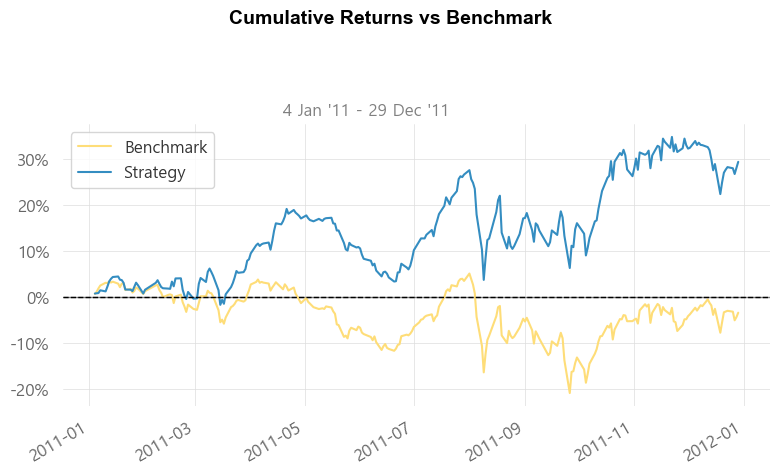

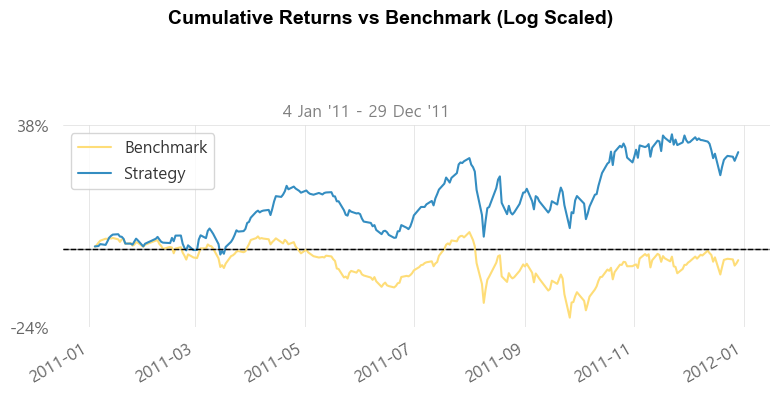

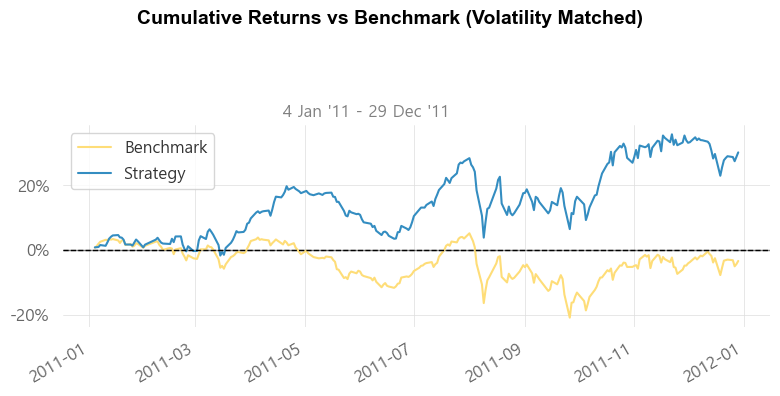

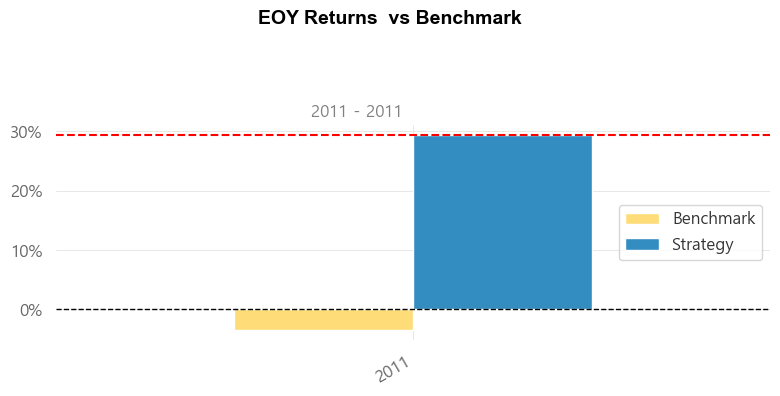

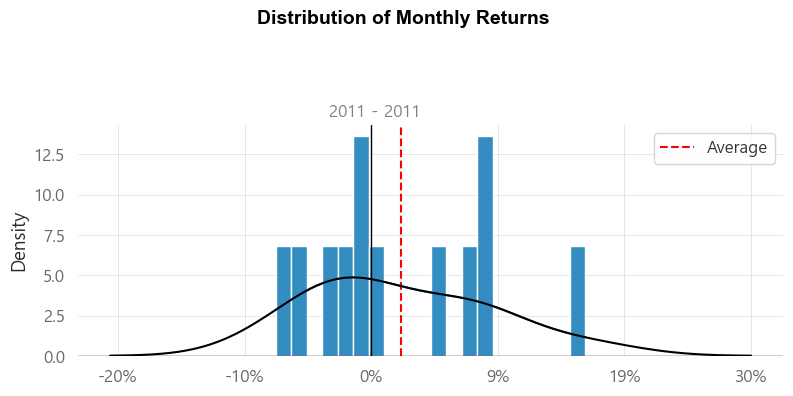

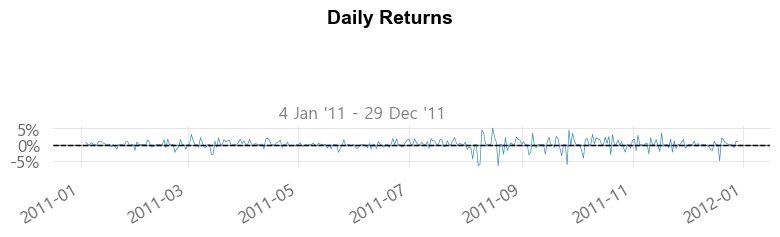

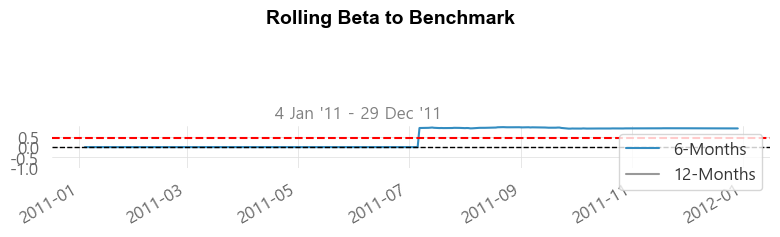

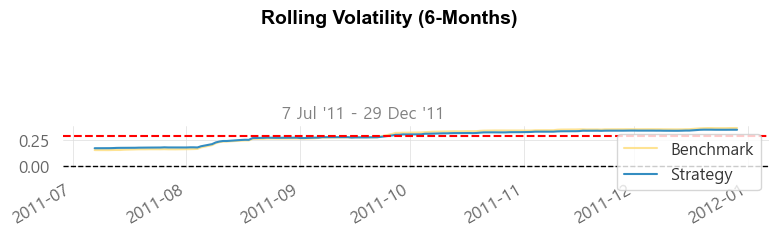

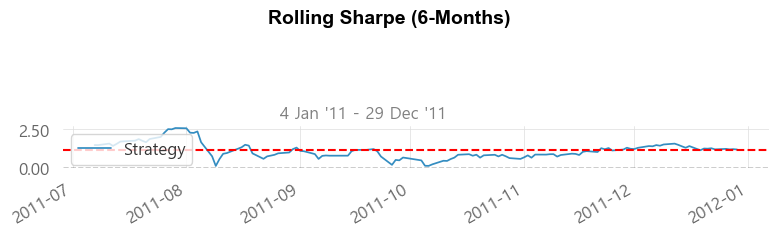

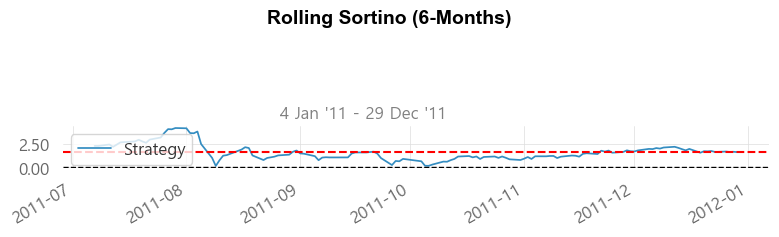

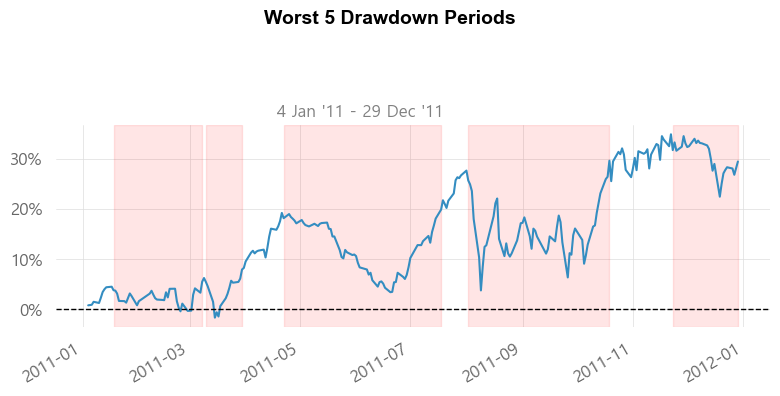

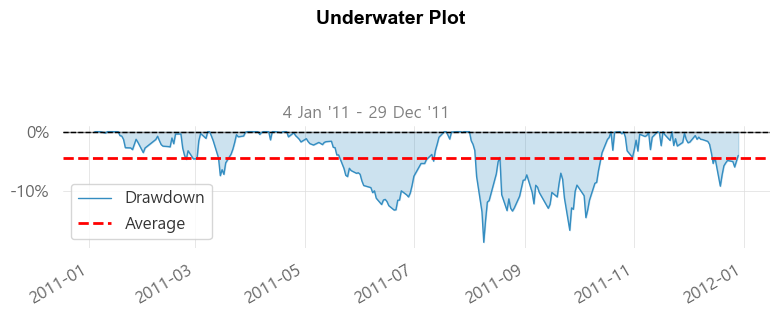

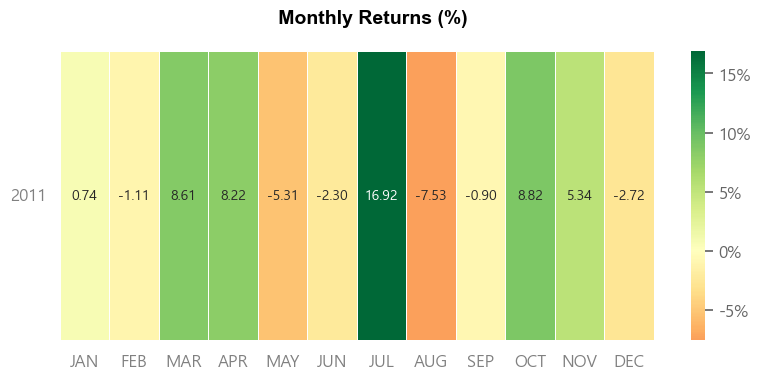

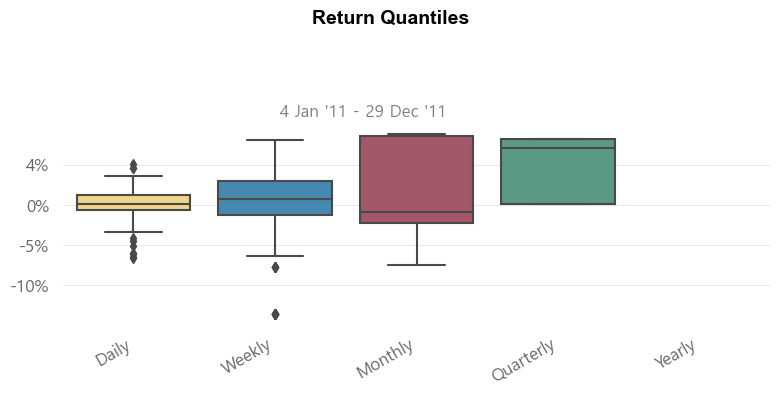

In [122]:

qs.reports.full(top20_2011_pct['포트폴리오 일일수익률'],top20_2011_pct['kosdaq'])